# Predicting The Profits Of 1000 Companies

In [1]:
# importing package libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

## Reading And Understanding The Data

In [2]:
data = pd.read_csv('1000_Companies.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [4]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [5]:
data['State'].value_counts()

California    344
New York      334
Florida       322
Name: State, dtype: int64

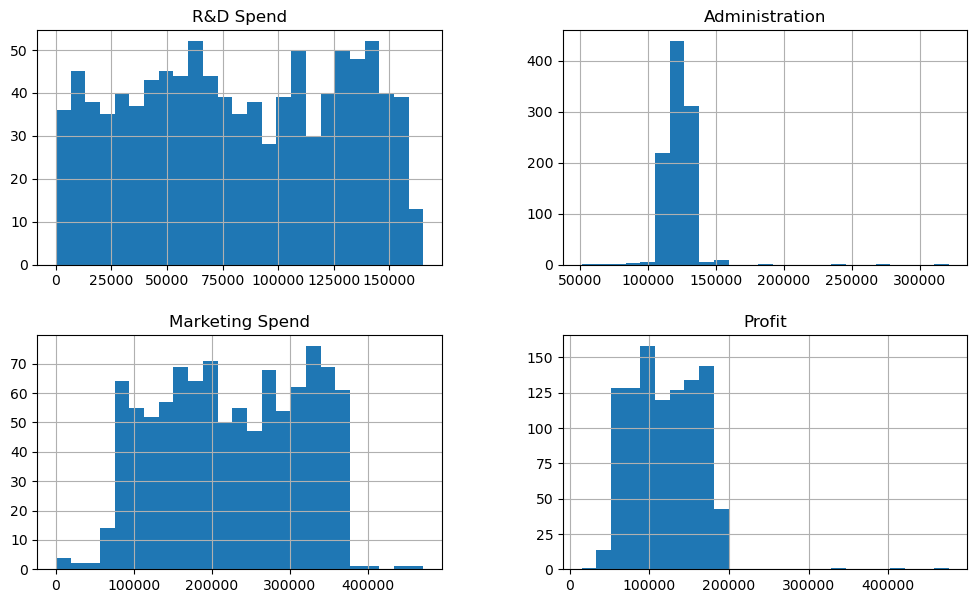

In [6]:
data.hist(bins=25, figsize=(12,7))
plt.show()

<AxesSubplot: >

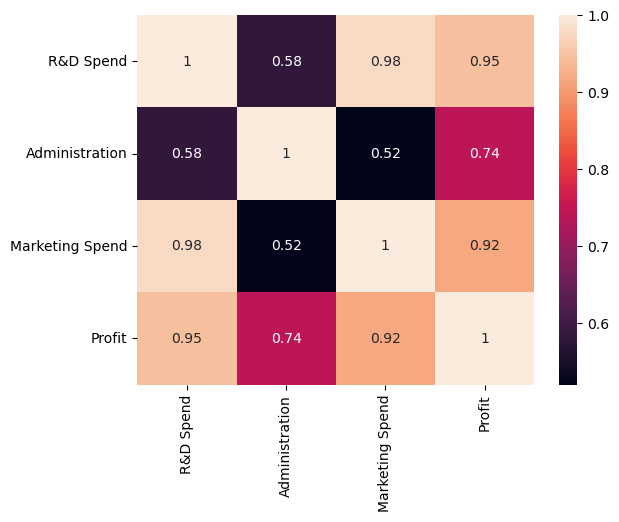

In [7]:
comp_corr = data.corr()
sns.heatmap(comp_corr, annot=True)

## Splitting And Training The Dataset

In [8]:
# creating the X and y variable
X = data.drop('Profit',axis=1)
y = data['Profit']

In [9]:
X.head() #displaying the head of X variable

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [10]:
y.head() #displaying the head of X variable

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

## Converting Non Numerical Values Into Numerical Values

In [11]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

label_encoder = LabelEncoder()
X[X.iloc[:,3]] = label_encoder.fit_transform(X.iloc[:,3])

ct = ColumnTransformer([("State", OneHotEncoder(),[3])], remainder="passthrough")
#X = one_hot_encoder.fit_transform(X).toarray()

 
 
X = ct.fit_transform(X) 

In [12]:
X = X[:, 1:] # removing the 1 extra column from 1hotEncoder

In [13]:
# Split the data into a Training and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

#### Create an Evaluate Function to give all metrics after model Training

In [14]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [15]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(normalize=True, tol=1e-2),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n');

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 10445.4501
- Mean Absolute Error: 2286.0665
- R2 Score: 0.9412
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5547.5348
- Mean Absolute Error: 1404.4378
- R2 Score: 0.9825


Lasso
Model performance for Training set
- Root Mean Squared Error: 10454.9123
- Mean Absolute Error: 2282.8279
- R2 Score: 0.9411
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5475.7851
- Mean Absolute Error: 1389.2260
- R2 Score: 0.9830


Ridge
Model performance for Training set
- Root Mean Squared Error: 10445.4504
- Mean Absolute Error: 2284.6073
- R2 Score: 0.9412
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5547.0023
- Mean Absolute Error: 1402.8997
- R2 Score: 0.9825


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 10072.5360
- Mean Absolute Error: 1097.9

## The Best Training Model is Decision Tree

Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5741.6853
- Mean Absolute Error: 645.9754
- R2 Score: 0.9813